In [1]:
from ase.io import read
atoms=read('optimized.vasp',format='vasp')
import numpy as np
natom=len(atoms.positions)
nmodes=natom*3
dyn_file='Dyn.form'
lammps_dyn=np.loadtxt(dyn_file).reshape((nmodes,nmodes))
eigenvalue, eigenvector=np.linalg.eigh(lammps_dyn)

In [2]:
eigenvector.shape

(1536, 1536)

In [3]:
#slow & direct

nmodes=len(eigenvector)
iprdat=np.zeros(nmodes)
for i in range(nmodes):
    vec=eigenvector[:,i]
    inner=vec*vec
    ipr=inner*inner
    print(ipr.sum())
    iprdat[i]=ipr.sum()
    

0.0008567803009368127
0.0010265934409922142
0.0006801696587544522
0.05287550311479567
0.001718578422879284
0.0022848251304184008
0.0024308181110330378
0.001906379464065993
0.001617986207351433
0.0019652799810073026
0.0020148178812501617
0.0013509731433915674
0.0016042540765238756
0.0018602059310980448
0.0016308022488993029
0.001705500309879341
0.0036215255025070477
0.0043244447662365414
0.004670391142454098
0.0025033079127263287
0.0023755032250187933
0.004063006350932339
0.002076197137275716
0.002492462238462354
0.002007457208858124
0.0026479374760831047
0.0020865354007352913
0.0018262945379048927
0.001800539047808565
0.0019427042082103625
0.0021664854462729406
0.0022906030418064906
0.002166963640780443
0.0017723560481748806
0.001967846034105017
0.0020459651487693543
0.00221210173692091
0.002000291938214751
0.0018602384649776932
0.0024234275718494403
0.001804584252722021
0.0025913575372645
0.002367103087330963
0.0029633108258807746
0.0024295382890692006
0.0029428680645110523
0.00208603

In [4]:
import pyAF.constants
pc=pyAF.constants.physical_constants()
omega=[]
nmodes=len(eigenvalue)
#extract minimum index of negative frequency
mode_negative=0
for i in range(nmodes):
    if eigenvalue[i] <0.0:
        val=0
        omega.append(val)
        mode_negative=i
    else:
        val=np.sqrt(eigenvalue[i])*pc.scale_THz
        omega.append(val)

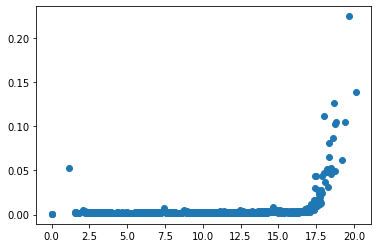

In [5]:
import matplotlib.pyplot as plt
plt.scatter(omega,iprdat)

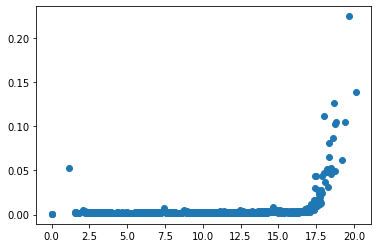

In [6]:
from pyAF.postprocess import get_IPR
ipr=get_IPR(eigenvector)

plt.scatter(omega,ipr)